In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np

SELECT
(CASE END)
WHERE
GROUP BY
ORDER BY
-------

-------
JOIN

In [2]:
filepath = r'C:\Users\serha\OneDrive\Desktop\Data_Science_New_Era\Data_Science_New_Era\dataset.csv'
df = pd.read_csv(filepath, parse_dates=['Order Date','Ship Date']).reset_index()
df

,index,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,2011-01-27,292494523,2011-02-12,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,1,Europe,Latvia,Beverages,Online,C,2015-12-28,361825549,2016-01-23,1075,47.45,31.79,51008.75,34174.25,16834.50
2,2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,2011-01-13,141515767,2011-02-01,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,2012-09-11,500364005,2012-10-06,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,4,Europe,Czech Republic,Beverages,Online,C,2015-10-27,127481591,2015-12-05,3491,47.45,31.79,165647.95,110978.89,54669.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Asia,Laos,Beverages,Online,H,2014-07-15,199342048,2014-07-31,8597,47.45,31.79,407927.65,273298.63,134629.02
9996,9996,Europe,Liechtenstein,Cosmetics,Online,C,2012-10-27,763044106,2012-11-01,562,437.20,263.33,245706.40,147991.46,97714.94
9997,9997,Sub-Saharan Africa,Democratic Republic of the Congo,Vegetables,Offline,M,2013-02-14,848579967,2013-03-20,2524,154.06,90.93,388847.44,229507.32,159340.12
9998,9998,Sub-Saharan Africa,South Africa,Meat,Online,L,2017-02-19,298185956,2017-02-22,8706,421.89,364.69,3672974.34,3174991.14,497983.20


In [3]:
# year, month, quarter, dayofweek,weekday_name -- order date
df_year = df['Order Date'].dt.year
df_quarter = df['Order Date'].dt.quarter
df_month = df['Order Date'].dt.month
df_dayofweek = df['Order Date'].dt.dayofweek
df_weekday_name = df['Order Date'].dt.day_name()


# df_order_year = df['Order_Year']
df['Order Year'] = df_year
df['Order Quarter'] = df_quarter
df['Order Month'] = df_month
df['Order Day of Week'] = df_dayofweek
df['Order Weekday Name'] =df_weekday_name
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days

df_orderdate = df[['Order Date','Order Year','Order Quarter','Order Month','Order Day of Week','Order Weekday Name', 'Shipping Days']]

# when shpping days < 7 then 'fast'
# shpping < 14 then 'normal'
# < 21 then 'slow'
# very slow
# case 
#   WHEN order days <= 7 Then 'fast'
#    WHEN lal ala then ccc
#    ELSE 
# 
# end

shipping_days_int = df_orderdate['Shipping Days'].to_numpy(dtype=int)


when = [
    (shipping_days_int <= 7), # Fast
    (shipping_days_int>7) & (shipping_days_int<=14), # Normal
    (shipping_days_int>14) & (shipping_days_int<=21) # Slow
]

then = ['Fast','Normal','Slow']

df_orderdate['Shipment Performance'] = np.select(when,then,default='Very Slow')
# df_orderdate

when = [0, 7, 14, 21, np.inf]
then = ['fast', 'normal', 'slow', 'very slow']
df_orderdate['shipping_status'] = pd.cut(
    df['Shipping Days'],
    bins=when,
    labels=then
)
df_orderdate


,Order Date,Order Year,Order Quarter,Order Month,Order Day of Week,Order Weekday Name,Shipping Days,Shipment Performance,shipping_status
0,2011-01-27,2011,1,1,3,Thursday,16,Slow,slow
1,2015-12-28,2015,4,12,0,Monday,26,Very Slow,very slow
2,2011-01-13,2011,1,1,3,Thursday,19,Slow,slow
3,2012-09-11,2012,3,9,1,Tuesday,25,Very Slow,very slow
4,2015-10-27,2015,4,10,1,Tuesday,39,Very Slow,very slow
...,...,...,...,...,...,...,...,...,...
9995,2014-07-15,2014,3,7,1,Tuesday,16,Slow,slow
9996,2012-10-27,2012,4,10,5,Saturday,5,Fast,fast
9997,2013-02-14,2013,1,2,3,Thursday,34,Very Slow,very slow
9998,2017-02-19,2017,1,2,6,Sunday,3,Fast,fast


In [4]:
# season.
# 12-1-2 winter
# 3-4-5 spring
# 6-7-8 Summer
# 9-10-11 autumn


import numpy as np

order_month = df_orderdate['Order Month'].astype(int)

when_seasons = [
    order_month.isin([12, 1, 2]),   # winter
    order_month.isin([3, 4, 5]),    # spring
    order_month.isin([6, 7, 8]),    # summer
    order_month.isin([9, 10, 11])   # autumn
]

then_seasons = ['winter', 'spring', 'summer', 'autumn']

df_orderdate['shipping_seasons'] = np.select(
    when_seasons, then_seasons, default='No Seasons'
)

df_orderdate


,Order Date,Order Year,Order Quarter,Order Month,Order Day of Week,Order Weekday Name,Shipping Days,Shipment Performance,shipping_status,shipping_seasons
0,2011-01-27,2011,1,1,3,Thursday,16,Slow,slow,winter
1,2015-12-28,2015,4,12,0,Monday,26,Very Slow,very slow,winter
2,2011-01-13,2011,1,1,3,Thursday,19,Slow,slow,winter
3,2012-09-11,2012,3,9,1,Tuesday,25,Very Slow,very slow,autumn
4,2015-10-27,2015,4,10,1,Tuesday,39,Very Slow,very slow,autumn
...,...,...,...,...,...,...,...,...,...,...
9995,2014-07-15,2014,3,7,1,Tuesday,16,Slow,slow,summer
9996,2012-10-27,2012,4,10,5,Saturday,5,Fast,fast,autumn
9997,2013-02-14,2013,1,2,3,Thursday,34,Very Slow,very slow,winter
9998,2017-02-19,2017,1,2,6,Sunday,3,Fast,fast,winter


In [5]:
def get_season(month):
    if month in [12,1,2]:
        return "winter"
    elif month in [3,4,5]:
        return "spring"
    elif month in [6,7,8]:
        return "summer"
    return 'fall'

df['season'] = df['Order Month'].apply(get_season)
df

,index,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,...,Total Revenue,Total Cost,Total Profit,Order Year,Order Quarter,Order Month,Order Day of Week,Order Weekday Name,Shipping Days,season
0,0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,2011-01-27,292494523,2011-02-12,4484,...,2920025.64,2353920.64,566105.00,2011,1,1,3,Thursday,16,winter
1,1,Europe,Latvia,Beverages,Online,C,2015-12-28,361825549,2016-01-23,1075,...,51008.75,34174.25,16834.50,2015,4,12,0,Monday,26,winter
2,2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,2011-01-13,141515767,2011-02-01,6515,...,1003700.90,592408.95,411291.95,2011,1,1,3,Thursday,19,winter
3,3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,2012-09-11,500364005,2012-10-06,7683,...,5134318.41,3861014.82,1273303.59,2012,3,9,1,Tuesday,25,fall
4,4,Europe,Czech Republic,Beverages,Online,C,2015-10-27,127481591,2015-12-05,3491,...,165647.95,110978.89,54669.06,2015,4,10,1,Tuesday,39,fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Asia,Laos,Beverages,Online,H,2014-07-15,199342048,2014-07-31,8597,...,407927.65,273298.63,134629.02,2014,3,7,1,Tuesday,16,summer
9996,9996,Europe,Liechtenstein,Cosmetics,Online,C,2012-10-27,763044106,2012-11-01,562,...,245706.40,147991.46,97714.94,2012,4,10,5,Saturday,5,fall
9997,9997,Sub-Saharan Africa,Democratic Republic of the Congo,Vegetables,Offline,M,2013-02-14,848579967,2013-03-20,2524,...,388847.44,229507.32,159340.12,2013,1,2,3,Thursday,34,winter
9998,9998,Sub-Saharan Africa,South Africa,Meat,Online,L,2017-02-19,298185956,2017-02-22,8706,...,3672974.34,3174991.14,497983.20,2017,1,2,6,Sunday,3,winter


In [ ]:
'''
select
    order_id, order_date, dayofweek(order_date) as day_of_week,
    case
        when day_of_week in (1,7) then 'weekend' 
        else 'weekday' as day_categroy, total_revenue
        from datast
        groupby order_date
'''

Mon 0
Tue 1
Wed 2
Thu 3
Fri 4
Sat
Sun

In [11]:
def day_category(Order_Day_of_Week):
    # the type of the var Order_Day_of_Week is integer.
    if Order_Day_of_Week in [0,1,2,3,4]:
        return 'WeekDay'
    elif Order_Day_of_Week in [5,6]:
        return 'Weekend'
    else:
        return 'Error'
    

df['Day_Category'] = df['Order Day of Week'].apply(day_category)  


In [12]:
df_limit = df[['Order ID', 'Order Date','Day_Category','Total Revenue','Total Profit']]
df_limit

,Order ID,Order Date,Day_Category,Total Revenue,Total Profit
0,292494523,2011-01-27,WeekDay,2920025.64,566105.00
1,361825549,2015-12-28,WeekDay,51008.75,16834.50
2,141515767,2011-01-13,WeekDay,1003700.90,411291.95
3,500364005,2012-09-11,WeekDay,5134318.41,1273303.59
4,127481591,2015-10-27,WeekDay,165647.95,54669.06
...,...,...,...,...,...
9995,199342048,2014-07-15,WeekDay,407927.65,134629.02
9996,763044106,2012-10-27,Weekend,245706.40,97714.94
9997,848579967,2013-02-14,WeekDay,388847.44,159340.12
9998,298185956,2017-02-19,Weekend,3672974.34,497983.20


In [18]:
# Order Counts by Itemtype


df_daycategory = df_limit.groupby('Day_Category').agg(
    Day_Category_Count = ('Order ID','count'),
    Sum_Total_Revenue = ('Total Revenue','sum'),
    Avg_Total_Revenue = ('Total Revenue','mean'),
    Avg_Total_Profit = ('Total Profit','mean')

)

df_daycategory.reset_index()



,Day_Category,Day_Category_Count,Sum_Total_Revenue,Avg_Total_Revenue,Avg_Total_Profit
0,WeekDay,7152,9.479711e+09,1.325463e+06,393768.734072
1,Weekend,2848,3.853840e+09,1.353174e+06,398405.718346


In [19]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ------------ --------------------------- 2.6/8.3 MB 14.5 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.3 MB 24.4 MB/s eta 0:00:01
   ---------------------------------------- 8.3/8.3 MB 21.2 MB/s  0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 13.1 MB/s  0:00:00
   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   --------------------- ------------------ 3.9/7.2 MB 21.9 MB/s eta 0:00:01
   ---------------------------------------  7.1/7.2 MB 20.0 MB/s eta 0:00:01
   ---------------------------------------- 7.2/7.2 MB 17.6 MB/s  0:00:00
Using cached pyparsing-3.3.2-py3-none-any.whl (122 kB)

   ---------------------

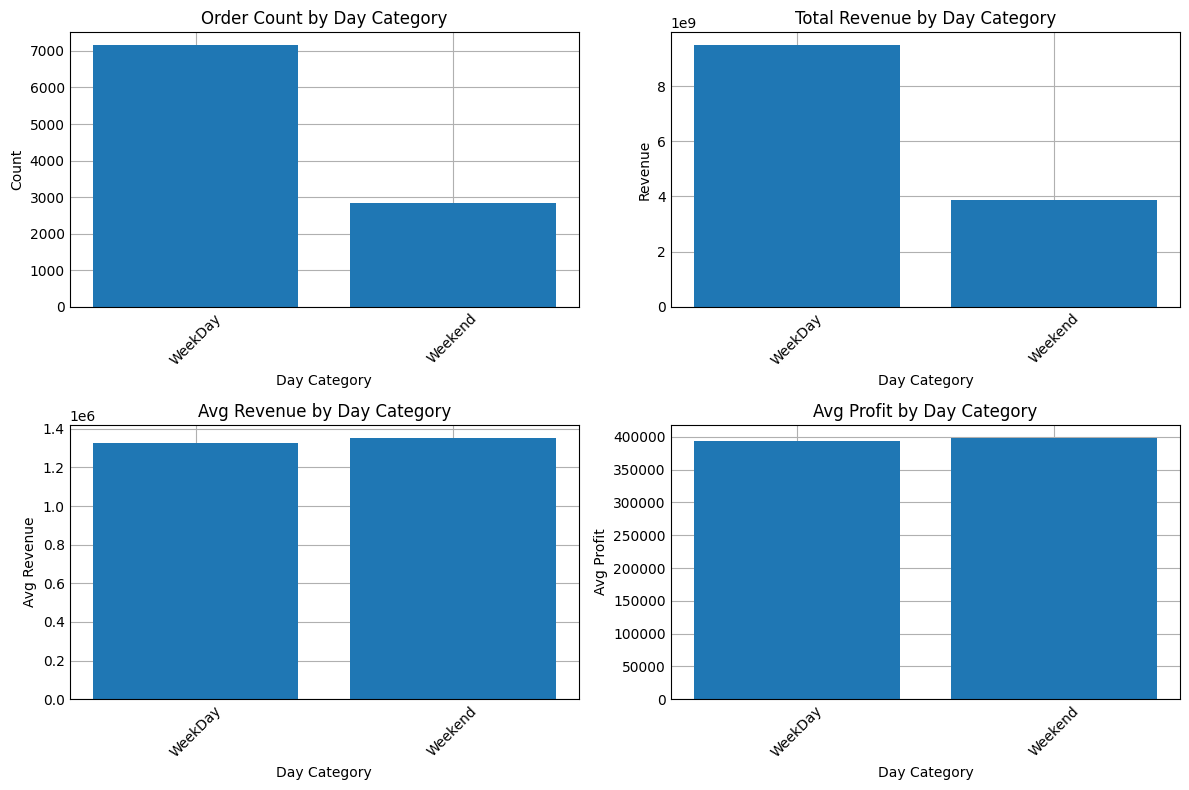

,Day_Category,Day_Category_Count,Sum_Total_Revenue,Avg_Total_Revenue,Avg_Total_Profit
0,WeekDay,7152,9.479711e+09,1.325463e+06,393768.734072
1,Weekend,2848,3.853840e+09,1.353174e+06,398405.718346


In [ ]:
import matplotlib.pyplot as plt

# Aggregate
df_daycategory = (
    df_limit.groupby("Day_Category", as_index=False)
    .agg(
        Day_Category_Count=("Order ID", "count"),
        Sum_Total_Revenue=("Total Revenue", "sum"),
        Avg_Total_Revenue=("Total Revenue", "mean"),
        Avg_Total_Profit=("Total Profit", "mean"),
    )
)

# Optional: sort categories for cleaner charts
df_daycategory = df_daycategory.sort_values("Day_Category")

plt.style.use("_mpl-gallery")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].bar(df_daycategory["Day_Category"], df_daycategory["Day_Category_Count"])
axes[0, 0].set_title("Order Count by Day Category")
axes[0, 0].set_ylabel("Count")


axes[0, 1].bar(df_daycategory["Day_Category"], df_daycategory["Sum_Total_Revenue"])
axes[0, 1].set_title("Total Revenue by Day Category")
axes[0, 1].set_ylabel("Revenue")

axes[1, 0].bar(df_daycategory["Day_Category"], df_daycategory["Avg_Total_Revenue"])
axes[1, 0].set_title("Avg Revenue by Day Category")
axes[1, 0].set_ylabel("Avg Revenue")

axes[1, 1].bar(df_daycategory["Day_Category"], df_daycategory["Avg_Total_Profit"])
axes[1, 1].set_title("Avg Profit by Day Category")
axes[1, 1].set_ylabel("Avg Profit")

for ax in axes.flat:
    ax.set_xlabel("Day Category")
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

df_daycategory
